# Desafío 1.
## Análisis exploratorio de un dataset de precios depropiedades

La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades para venta y alquiler. 
Ud. deberá asesorar a la inmobiliaria a desarrollar un modelo de regresión que permita predecir el precio por metro cuadrado de una propiedad. 
El objetivo final es que el modelo que desarrollen sea utilizado como tasador automático a ser aplicados a las próximas propiedades que sean comercializadas por la empresa. 
Para ello la empresa le provee de un dataset correspondiente al primer semestre de 2017.

## Dataset 
 
El dataset contiene información sobre todas las propiedades georeferenciadas de la base de datos de la empresa.
La información de cada propiedad que incluye es la siguiente: 

* Fecha de creación 
* Tipo de la propiedad (house, apartment, ph) 
* Operación del aviso (sell, rent) 
* Nombre del lugar 
* Nombre del lugar + nombre de sus ‘padres’ 
* ID de geonames del lugar (si está disponible) 
* Latitud,Longitud 
* Precio original del aviso 
* Moneda original del aviso (ARS, USD) 
* Precio del aviso en moneda local (ARS) 
* Precio aproximado en USD 
* Superficie en m² 
* Superficie cubierta en m² 
* Precio en USD/m² 
* Precio por m² 
* N° de piso, si corresponde 
* Ambientes 
* URL en Properati 
* Descripción 
* Título 
* URL de un thumbnail de la primer foto 

## Limpieza de datos

In [1]:
%config IPCompleter.greedy=True

In [2]:
#Imports
import pandas as pd
import numpy as np

In [3]:
#Leer
data = pd.read_csv("../data/properati.csv", sep=",")
data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [4]:
#Informacion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

&emsp;
### 1. Columna **operation**

**Descripcion:**<br>
Contiene solo el dato **'sell'** en todas sus filas.

**Accion:**<br>
Se descarta<br>

In [5]:
data.loc[:, 'operation'].value_counts()

sell    121220
Name: operation, dtype: int64

&emsp;
### 2. Columna **property_type**

**Descripcion:**<br>
Tipo de la propiedad (house, apartment, ph), no contiene nulos.

**Accion:**<br>
Sin tratamiento

In [6]:
data.loc[:, 'property_type'].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [7]:
print('Cantidad de nulos:', data.loc[:, 'property_type'].isnull().sum())

Cantidad de nulos: 0


In [8]:
print('Valores:', data.loc[:, 'property_type'].unique())

Valores: ['PH' 'apartment' 'house' 'store']


&emsp;
### 3. Columna **place_name**

**Descripcion:**<br>
Nombre del lugar, contiene 23 nulos, todos los registros tienen el mismo valor en el campo **place_with_parent_names**.

**Accion:**<br>
Se completan los valores nulos con el ultimo valor del campo **place_with_parent_names**.<br><br>
**Ej.**
place_with_parent_names: |Argentina|Bs.As. G.B.A. Zona Norte|**Tigre**||<br>
place_name: **Tigre**

In [9]:
data.loc[:, 'place_name'].value_counts()

Córdoba               9254
Rosario               8504
Mar del Plata         6534
Tigre                 3324
Nordelta              3315
                      ... 
Cabildo                  1
Arroyo Ceibal            1
Marull                   1
Sierras Bayas            1
Paso de los Libres       1
Name: place_name, Length: 1060, dtype: int64

In [10]:
print('Cantidad de nulos:', data.loc[:, 'place_name'].isnull().sum())

Cantidad de nulos: 23


In [11]:
place_name_mask = data.loc[:, 'place_name'].isnull()
data.loc[place_name_mask, :]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
6489,6489,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,...,240.0,2708.333333,2708.333333,NaN,NaN,NaN,http://www.properati.com.ar/15ui7_venta_casa_t...,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/7/vQjgbHSz1fKXxy...
10201,10201,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,...,300.0,NaN,1783.333333,NaN,5.0,NaN,http://www.properati.com.ar/166p5_venta_casa_t...,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,https://thumbs4.properati.com/1/FABpKIJMaoAO3t...
11451,11451,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,...,270.0,253.456221,2037.037037,NaN,NaN,NaN,http://www.properati.com.ar/16bpd_venta_casa_t...,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE,https://thumbs4.properati.com/5/fwH9L71hW2rW7V...
14839,14839,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,...,200.0,2000.000000,2400.000000,NaN,NaN,NaN,http://www.properati.com.ar/16tal_venta_casa_b...,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/1/3ZbPSffTY38y7v...
18622,18622,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,...,340.0,3814.705882,3814.705882,NaN,NaN,NaN,http://www.properati.com.ar/177ee_venta_casa_t...,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...,https://thumbs4.properati.com/0/52JCH1PKYCOMe6...
21922,21922,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,...,220.0,NaN,2000.000000,NaN,5.0,NaN,http://www.properati.com.ar/17gy5_venta_casa_s...,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre,https://thumbs4.properati.com/8/oO7kmFPYNm8DYr...
23664,23664,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,...,294.0,1632.653061,1632.653061,NaN,NaN,NaN,http://www.properati.com.ar/17mb5_venta_casa_t...,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA,https://thumbs4.properati.com/2/LQCwH6txpFqetn...
24722,24722,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,...,270.0,1677.215190,1962.962963,NaN,NaN,NaN,http://www.properati.com.ar/17oz1_venta_casa_t...,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/0/Nhx4NejZaQACap...
38856,38856,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,550.0,NaN,2454.545455,NaN,NaN,NaN,http://www.properati.com.ar/18mcb_venta_casa_t...,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta",https://thumbs4.properati.com/2/Izq8d5o8ti3kJy...
45970,45970,sell,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,...,27.0,1727.272727,3518.518519,NaN,1.0,NaN,http://www.properati.com.ar/1958f_venta_depart...,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",Excelente 

In [12]:
import re

# reemplaza "Buenos Aires" por "Bs As"
bunenos_aires_pattern = "Buenos Aires\s*"
bunenos_aires_pattern_regex = re.compile(bunenos_aires_pattern)

In [13]:
#Se crea la nueva columna
data.loc[:, 'place_name_clean'] = data.loc[:, 'place_name'].copy()
print('Cantidad de mulos:', data.loc[:, 'place_name_clean'].isnull().sum())

Cantidad de mulos: 23


In [14]:
#Se reemplazan los nulos por 'Tigre'
data.loc[place_name_mask, 'place_name_clean'] = 'Tigre'
print('Cantidad de mulos:', data.loc[:, 'place_name_clean'].isnull().sum())

Cantidad de mulos: 0


In [15]:
data.loc[place_name_mask, ['place_name','place_name_clean']]

,place_name,place_name_clean
6489,NaN,Tigre
10201,NaN,Tigre
11451,NaN,Tigre
14839,NaN,Tigre
18622,NaN,Tigre
21922,NaN,Tigre
23664,NaN,Tigre
24722,NaN,Tigre
38856,NaN,Tigre
45970,NaN,Tigre


In [16]:
place_name_con_buenos_aires = data.loc[:, 'place_name_clean'].apply(lambda x: bunenos_aires_pattern_regex.sub('Bs.As. ', x))
data.loc[:, 'place_name_clean'] = place_name_con_buenos_aires

&emsp;
### 4. Columna **place_with_parent_names**

**Descripcion:**<br>
Nombre del lugar + nombre de sus 'padres’, no contiene nulos, los valores esta normalizados.

**Accion:**<br>
Se unifican los valores **"Buenos Aires"** por **"Bs. As. "**<br>

In [17]:
data.loc[:, 'place_with_parent_names'].value_counts().sort_index()

|Argentina|Bs.As. G.B.A. Zona Norte|                                     222
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|                            1037
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| Country Maschwitz Club|       3
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Acacias Blancas|              34
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Altos de Matheu|               2
                                                                        ... 
|Argentina|Tucumán|San Miguel de Tucumán|                                362
|Argentina|Tucumán|Tafí Viejo|                                            16
|Argentina|Tucumán|Tafí del Valle|                                        22
|Argentina|Tucumán|Villa Belgrano|                                         1
|Argentina|Tucumán|Yerba Buena|                                          191
Name: place_with_parent_names, Length: 1164, dtype: int64

In [18]:
print('Cantidad de nulos:', data.loc[:, 'place_with_parent_names'].isnull().sum())

Cantidad de nulos: 0


In [19]:
#Copia la columna
data.loc[:, 'place_with_parent_names_clean'] = data.loc[:, 'place_with_parent_names'].copy()

In [20]:
place_with_parent_names_con_buenos_aires = data.loc[:, 'place_with_parent_names_clean'].apply(lambda x: bunenos_aires_pattern_regex.sub('Bs.As. ', x))
data.loc[:, 'place_with_parent_names_clean'] = place_with_parent_names_con_buenos_aires

In [21]:
data.loc[:, ['place_with_parent_names', 'place_with_parent_names_clean']]

,place_with_parent_names,place_with_parent_names_clean
0,|Argentina|Capital Federal|Mataderos|,|Argentina|Capital Federal|Mataderos|
1,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2,|Argentina|Capital Federal|Mataderos|,|Argentina|Capital Federal|Mataderos|
3,|Argentina|Capital Federal|Liniers|,|Argentina|Capital Federal|Liniers|
4,|Argentina|Buenos Aires Costa Atlántica|Mar de...,|Argentina|Bs.As. Costa Atlántica|Mar del Plat...
...,...,...
121215,|Argentina|Capital Federal|Belgrano|,|Argentina|Capital Federal|Belgrano|
121216,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...
121217,|Argentina|Capital Federal|Villa Urquiza|,|Argentina|Capital Federal|Villa Urquiza|
121218,|Argentina|Buenos Aires Costa Atlántica|Mar de...,|Argentina|Bs.As. Costa Atlántica|Mar del Plat...


&emsp;
### 5. Columna **country_name**

**Descripcion:**<br>
Nombre de pais, no contiene nulos, los valores esta normalizados.

**Accion:**<br>
Determinar relevancia.<br>

In [22]:
data.loc[:, 'country_name'].value_counts()

Argentina    121220
Name: country_name, dtype: int64

In [23]:
print('Cantidad de mulos:', data.loc[:, 'country_name'].isnull().sum())

Cantidad de mulos: 0


&emsp;
### 6. Columna **state_name**

**Descripcion:**<br>
Nombre de estado, no contiene nulos, los valores estan normalizados.

**Accion:**<br> Se unifican los valores **"Buenos Aires"** por **"Bs. As. "**<br>

In [24]:
data.loc[:, 'state_name'].value_counts().sort_index()

Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Oeste         9322
Bs.As. G.B.A. Zona Sur          13952
Buenos Aires Costa Atlántica    10006
Buenos Aires Interior            2291
Capital Federal                 32316
Catamarca                          27
Chaco                              57
Chubut                            259
Corrientes                        583
Córdoba                         12069
Entre Ríos                        369
Formosa                            65
Jujuy                              26
La Pampa                          157
La Rioja                            4
Mendoza                           681
Misiones                          464
Neuquén                           733
Río Negro                         808
Salta                             278
San Juan                           40
San Luis                          252
Santa Cruz                         20
Santa Fe                        10172
Santiago Del Estero                 4
Tierra Del F

In [25]:
print('Cantidad de mulos:', data.loc[:, 'state_name'].isnull().sum())

Cantidad de mulos: 0


In [26]:
#Salvar los datos
#dump = data.groupby('state_name').size()
#dump = dump.sort_index()
#dump
#dump.to_csv("../data/state_name_groups.csv")

In [27]:
#Se crea la nueva columna
data.loc[:, 'state_name_clean'] = data.loc[:, 'state_name'].copy()

In [28]:
#reemplaza "Buenos Aires" por "Bs As"
state_name_con_buenos_aires = data.loc[:, 'state_name_clean'].apply(lambda x: bunenos_aires_pattern_regex.sub('Bs.As. ', x))

In [29]:
data.loc[:, 'state_name_clean'] = state_name_con_buenos_aires
data.loc[:, 'state_name_clean'].value_counts().sort_index()

Bs.As. Costa Atlántica      10006
Bs.As. G.B.A. Zona Norte    25560
Bs.As. G.B.A. Zona Oeste     9322
Bs.As. G.B.A. Zona Sur      13952
Bs.As. Interior              2291
Capital Federal             32316
Catamarca                      27
Chaco                          57
Chubut                        259
Corrientes                    583
Córdoba                     12069
Entre Ríos                    369
Formosa                        65
Jujuy                          26
La Pampa                      157
La Rioja                        4
Mendoza                       681
Misiones                      464
Neuquén                       733
Río Negro                     808
Salta                         278
San Juan                       40
San Luis                      252
Santa Cruz                     20
Santa Fe                    10172
Santiago Del Estero             4
Tierra Del Fuego               31
Tucumán                       674
Name: state_name_clean, dtype: int64

In [30]:
data.loc[:, ['state_name', 'state_name_clean']]

,state_name,state_name_clean
0,Capital Federal,Capital Federal
1,Bs.As. G.B.A. Zona Sur,Bs.As. G.B.A. Zona Sur
2,Capital Federal,Capital Federal
3,Capital Federal,Capital Federal
4,Buenos Aires Costa Atlántica,Bs.As. Costa Atlántica
...,...,...
121215,Capital Federal,Capital Federal
121216,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Norte
121217,Capital Federal,Capital Federal
121218,Buenos Aires Costa Atlántica,Bs.As. Costa Atlántica


&emsp;
### Evaluar relacion entre las columnas **state_name_clean** y **place_with_parent_names_clean**

In [31]:
data.loc[:, ['state_name_clean', 'place_with_parent_names_clean']]

,state_name_clean,place_with_parent_names_clean
0,Capital Federal,|Argentina|Capital Federal|Mataderos|
1,Bs.As. G.B.A. Zona Sur,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2,Capital Federal,|Argentina|Capital Federal|Mataderos|
3,Capital Federal,|Argentina|Capital Federal|Liniers|
4,Bs.As. Costa Atlántica,|Argentina|Bs.As. Costa Atlántica|Mar del Plat...
...,...,...
121215,Capital Federal,|Argentina|Capital Federal|Belgrano|
121216,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...
121217,Capital Federal,|Argentina|Capital Federal|Villa Urquiza|
121218,Bs.As. Costa Atlántica,|Argentina|Bs.As. Costa Atlántica|Mar del Plat...


In [32]:
def compara_campos(state_name, place_with_parent_names_clean):
    ret = state_name in place_with_parent_names_clean
    return(ret)

mask = data.apply(lambda x: compara_campos(x['state_name_clean'], x['place_with_parent_names_clean']), axis=1)

In [33]:
mask.value_counts()

True    121220
dtype: int64

&emsp;
### Evaluar relacion entre las columnas **place_name_clean** y **place_with_parent_names_clean**

In [34]:
data.loc[:, ['place_name_clean', 'place_with_parent_names_clean']]

,place_name_clean,place_with_parent_names_clean
0,Mataderos,|Argentina|Capital Federal|Mataderos|
1,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2,Mataderos,|Argentina|Capital Federal|Mataderos|
3,Liniers,|Argentina|Capital Federal|Liniers|
4,Centro,|Argentina|Bs.As. Costa Atlántica|Mar del Plat...
...,...,...
121215,Belgrano,|Argentina|Capital Federal|Belgrano|
121216,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...
121217,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|
121218,Plaza Colón,|Argentina|Bs.As. Costa Atlántica|Mar del Plat...


In [35]:
mask = data.apply(lambda x: compara_campos(x['place_name_clean'], x['place_with_parent_names_clean']), axis=1)

In [36]:
mask.value_counts()

True    121220
dtype: int64

In [37]:
maskInversa = ~mask

In [38]:
maskInversa.value_counts()

False    121220
dtype: int64

In [39]:
data_place_name_IN_place_with_parent_names_clean = data.loc[maskInversa, ['place_name_clean', 'place_with_parent_names_clean']]

In [40]:
data_place_name_IN_place_with_parent_names_clean['place_name_clean'].value_counts()

Series([], Name: place_name_clean, dtype: int64)

In [41]:
pd.options.display.max_colwidth = 1000
data.loc[:, ['place_name_clean', 'place_with_parent_names_clean']].sort_values(by='place_name_clean',ascending=True)

,place_name_clean,place_with_parent_names_clean
33586,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| Country Maschwitz Club|
45159,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| Country Maschwitz Club|
42404,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| Country Maschwitz Club|
23730,los alamos,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre| los alamos|
25553,9 de Abril,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Echeverría|9 de Abril|
...,...,...
40779,Zárate,|Argentina|Bs.As. Interior|Zárate|
11760,Zárate,|Argentina|Bs.As. Interior|Zárate|
40781,Zárate,|Argentina|Bs.As. Interior|Zárate|
7367,coordenadas 34.255511,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|coordenadas 34.255511|


&emsp;
### Evaluar relacion entre las columnas **country_name** y **place_with_parent_names_clean**

In [42]:
data.loc[:, ['country_name', 'place_with_parent_names_clean']]

,country_name,place_with_parent_names_clean
0,Argentina,|Argentina|Capital Federal|Mataderos|
1,Argentina,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2,Argentina,|Argentina|Capital Federal|Mataderos|
3,Argentina,|Argentina|Capital Federal|Liniers|
4,Argentina,|Argentina|Bs.As. Costa Atlántica|Mar del Plata|Centro|
...,...,...
121215,Argentina,|Argentina|Capital Federal|Belgrano|
121216,Argentina,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|Beccar|
121217,Argentina,|Argentina|Capital Federal|Villa Urquiza|
121218,Argentina,|Argentina|Bs.As. Costa Atlántica|Mar del Plata|Plaza Colón|


In [43]:
mask = data.apply(lambda x: compara_campos(x['country_name'], x['place_with_parent_names_clean']), axis=1)
data_country_name_IN_place_with_parent_names_clean = data.loc[mask, ['country_name', 'place_with_parent_names_clean']]

In [44]:
data_country_name_IN_place_with_parent_names_clean['country_name'].value_counts()

Argentina    121220
Name: country_name, dtype: int64

### Conclusión:
Todos los campos de las columnas **contry_name, place_name_clean y state_name_clean** estan contenidos en la columna **place_with_parent_names_clean**, con lo cual, las columnas **contry_name, place_name_clean y state_name_clean** se podrian descartar. 

In [45]:
#pd.options.display.max_colwidth = 1000
#dump = data.loc[:, ['place_with_parent_names_clean']].sort_values(by='place_with_parent_names_clean')
#dump.to_csv("../data/place_with_parent_names_clean.csv")

&emsp;
### Dividir la columna **place_with_parent_names_clean** en subcolumnas

In [46]:
 data.loc[:, ['place_with_parent_names_clean']].sort_values(by='place_with_parent_names_clean')

,place_with_parent_names_clean
90453,|Argentina|Bs.As. Costa Atlántica|
72981,|Argentina|Bs.As. Costa Atlántica|
77251,|Argentina|Bs.As. Costa Atlántica|
91651,|Argentina|Bs.As. Costa Atlántica|
68033,|Argentina|Bs.As. Costa Atlántica|
...,...
16813,|Argentina|Tucumán|Yerba Buena|
61352,|Argentina|Tucumán|Yerba Buena|
68347,|Argentina|Tucumán|Yerba Buena|
105206,|Argentina|Tucumán|Yerba Buena|


In [47]:
pd.options.display.max_colwidth = 1000

In [48]:
#Crea el diccionario
dic_ret = dict()

In [49]:
#Determina la maxima cantidad de columnas
colSizes = data['place_with_parent_names_clean'].apply(lambda x: len(x.split('|'))-2)
colSizesSorted = colSizes.sort_values(ascending=False)

In [50]:
numeroDeColunas = colSizesSorted.values[0]
numeroDeColunas

5

In [51]:
#Total de filas de dataFrame
totalSize = data.shape[0]

#Completa el diccionario con los datos en None
def completarDic(numeroDeColunas):
    i=0
    for col in range(numeroDeColunas):
        cn = 'place_' +  str(i)
        dic_ret[cn] = ([None] * totalSize)
        i += 1

In [52]:
completarDic(numeroDeColunas)
print(dic_ret.keys())

len(dic_ret['place_0'])

dict_keys(['place_0', 'place_1', 'place_2', 'place_3', 'place_4'])


121220

In [53]:
def dividirColumnas(index, value):
    i = 0;
    ret = value.split('|')
    for x in ret:
        if len(x) > 0:
            colName = 'place_' +  str(i)
            dic_ret[colName][index] = x
            i += 1
    return(ret)

In [54]:
def procesaDatos(serie):
    for x in serie.index:
        dividirColumnas(x, serie.loc[x])

In [55]:
procesaDatos(data['place_with_parent_names_clean'])

In [56]:
data_location = pd.DataFrame(dic_ret)
data_location.head()

,place_0,place_1,place_2,place_3,place_4
0,Argentina,Capital Federal,Mataderos,None,None
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,None,None
2,Argentina,Capital Federal,Mataderos,None,None
3,Argentina,Capital Federal,Liniers,None,None
4,Argentina,Bs.As. Costa Atlántica,Mar del Plata,Centro,None


In [73]:
#Aagrega la coluna 'place_with_parent_names_clean' para comparar
data_location['place_with_parent_names_clean'] = data['place_with_parent_names_clean']
data_location['property_type'] = data['property_type']

In [74]:
data_location.head()

,place_0,place_1,place_2,place_3,place_4,place_with_parent_names_clean,property_type
0,Argentina,Capital Federal,Mataderos,None,None,|Argentina|Capital Federal|Mataderos|,PH
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,None,None,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,apartment
2,Argentina,Capital Federal,Mataderos,None,None,|Argentina|Capital Federal|Mataderos|,apartment
3,Argentina,Capital Federal,Liniers,None,None,|Argentina|Capital Federal|Liniers|,PH
4,Argentina,Bs.As. Costa Atlántica,Mar del Plata,Centro,None,|Argentina|Bs.As. Costa Atlántica|Mar del Plata|Centro|,apartment


In [182]:
data_location.describe()

,place_0,place_1,place_2,place_3,place_4,place_with_parent_names_clean,property_type
count,121220,121220,116440,40417,548,121220,121220
unique,1,28,538,567,16,1164,4
top,Argentina,Capital Federal,Tigre,Nordelta,Barrio Los Alisos,|Argentina|Santa Fe|Rosario|,apartment
freq,121220,32316,8983,3863,278,8504,71065


In [196]:
#Agrupa los datos por tipo y localidad
dfAgrupadoPorTipo = data_location.groupby(by=['property_type', 'place_1'])

In [208]:
data_location.loc[:, 'property_type'].unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [209]:
#Toma cada grupo
grPH = dfAgrupadoPorTipo.size()['PH'].sort_values()
grAP = dfAgrupadoPorTipo.size()['apartment'].sort_values()
grHO = dfAgrupadoPorTipo.size()['house'].sort_values()
grST = dfAgrupadoPorTipo.size()['store'].sort_values()

In [216]:
#Agrupa el total de las publicaciones
grTotalPublicaciones = data_location.groupby(by='property_type').size().sort_values()

In [241]:
import matplotlib.pyplot as plt

def graficarCantidadPorLocalidad(df, titulo):
    b1 = plt.bar(df.keys(), df.values, width=0.6, label = titulo, align="center")
    plt.ylim([0,df.values.max()])
    plt.xlim([0,df.values.size])
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

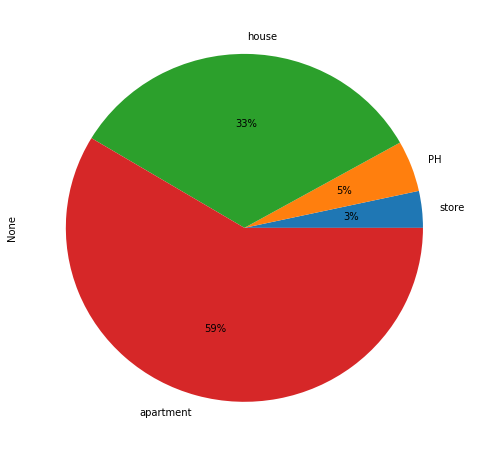

In [236]:
grTotalPublicaciones.plot.pie(autopct='%1.0f%%', figsize=(8, 8))

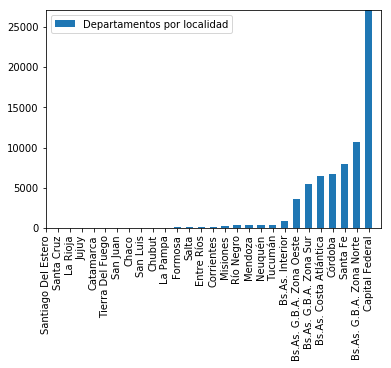

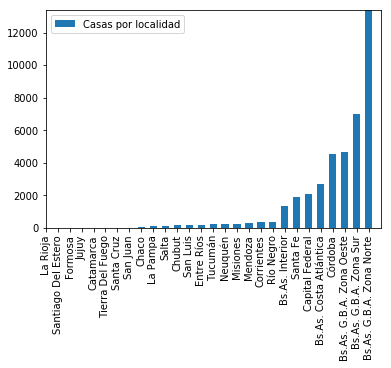

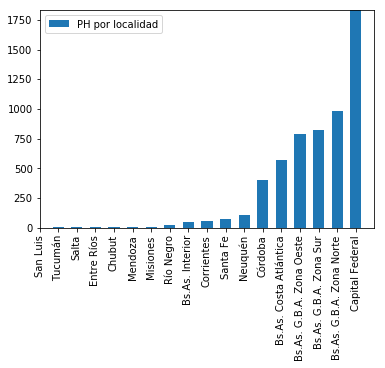

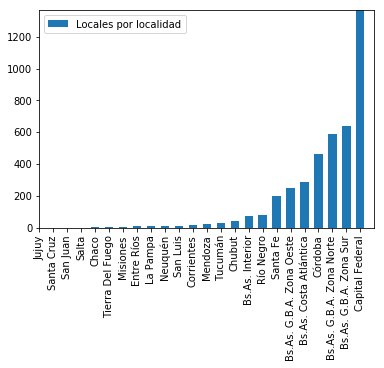

In [242]:
graficarCantidadPorLocalidad(grAP, 'Departamentos por localidad')
graficarCantidadPorLocalidad(grHO, 'Casas por localidad')
graficarCantidadPorLocalidad(grPH, 'PH por localidad')
graficarCantidadPorLocalidad(grST, 'Locales por localidad')

## Conclusión final: 

### Se deberían reemplazar las columnas
* place_name
* place_with_parent_names
* country_name
* state_name

### Por las nuevas columnas:
* place_0
* place_1
* place_2
* place_3
* place_4

En las cuales se encuentra modelada la jerarquía de cada ubicación.